In [9]:
%matplotlib inline



# Compute source power spectral density (PSD) in a label

Returns an STC file containing the PSD (in dB) of each of the sources
within a label.


In [19]:
# Authors: Alexandre Gramfort <alexandre.gramfort@inria.fr>
#
# License: BSD-3-Clause

In [23]:
import matplotlib.pyplot as plt

import mne
from mne import io
from mne.datasets import sample
from mne.minimum_norm import read_inverse_operator, compute_source_psd

print(__doc__)

mne.__version__

Automatically created module for IPython interactive environment


'1.3.0'

Set parameters



In [21]:
data_path = sample.data_path()
meg_path = data_path / 'MEG' / 'sample'
raw_fname = meg_path / 'sample_audvis_raw.fif'
fname_inv = meg_path / 'sample_audvis-meg-oct-6-meg-inv.fif'
fname_label = meg_path / 'labels' / 'Aud-lh.label'

# Setup for reading the raw data
raw = io.read_raw_fif(raw_fname, verbose=False)
events = mne.find_events(raw, stim_channel='STI 014')
inverse_operator = read_inverse_operator(fname_inv)
raw.info['bads'] = ['MEG 2443', 'EEG 053']

# picks MEG gradiometers
picks = mne.pick_types(raw.info, meg=True, eeg=False, eog=True,
                       stim=False, exclude='bads')

tmin, tmax = 0, 120  # use the first 120s of data
fmin, fmax = 4, 100  # look at frequencies between 4 and 100Hz
n_fft = 2048  # the FFT size (n_fft). Ideally a power of 2
label = mne.read_label(fname_label)

stc = compute_source_psd(raw, inverse_operator, lambda2=1. / 9., method="dSPM",
                         tmin=tmin, tmax=tmax, fmin=fmin, fmax=fmax,
                         pick_ori="normal", n_fft=n_fft, label=label,
                         dB=True)

stc.save('psd_dSPM', overwrite=True)

320 events found
Event IDs: [ 1  2  3  4  5 32]
Reading inverse operator decomposition from /home/nahuel/Documents/TESIS/DATA/mne_data/MNE-sample-data/MEG/sample/sample_audvis-meg-oct-6-meg-inv.fif...
    Reading inverse operator info...
    [done]
    Reading inverse operator decomposition...
    [done]
    305 x 305 full covariance (kind = 1) found.
    Read a total of 4 projection items:
        PCA-v1 (1 x 102) active
        PCA-v2 (1 x 102) active
        PCA-v3 (1 x 102) active
        Average EEG reference (1 x 60) active
    Noise covariance matrix read.
    22494 x 22494 diagonal covariance (kind = 2) found.
    Source covariance matrix read.
    22494 x 22494 diagonal covariance (kind = 6) found.
    Orientation priors read.
    22494 x 22494 diagonal covariance (kind = 5) found.
    Depth priors read.
    Did not find the desired covariance matrix (kind = 3)
    Reading a source space...
    Computing patch statistics...
    Patch information added...
    Distance informati


Writing STC to disk...
Overwriting existing file.
Overwriting existing file.
[done]


View PSD of sources in label



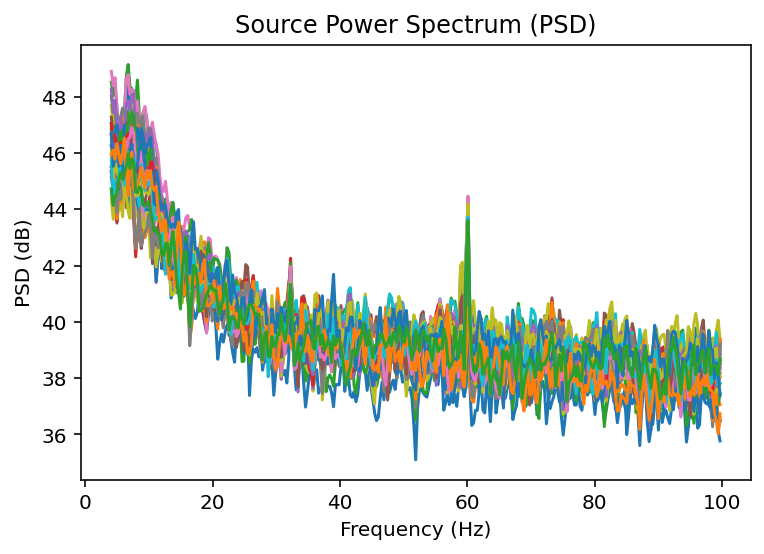

In [22]:
plt.plot(stc.times, stc.data.T)
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD (dB)')
plt.title('Source Power Spectrum (PSD)')
plt.show()